In [118]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
# from keras.utils import np_utils
from keras.utils import to_categorical
import itertools
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout

# Import Dataset

In [12]:
df = pd.read_csv('./household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

/var/folders/2w/qn43kbgn4p9g1b7tj_8r1fwr0000gn/T/ipykernel_77447/2066796366.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('./household_power_consumption.txt', sep=';',
/var/folders/2w/qn43kbgn4p9g1b7tj_8r1fwr0000gn/T/ipykernel_77447/2066796366.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('./household_power_consumption.txt', sep=';',


In [13]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
df.shape

(2075259, 7)

# EDA
## Data Preprocessing
Since there are a lot of missing value, we should solve this problem. I use mean value imputation by columns here.

In [15]:
df.isnull().any()

Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
dtype: bool

In [16]:
df=df.fillna(df.mean())

In [17]:
df.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

## Data Visualization

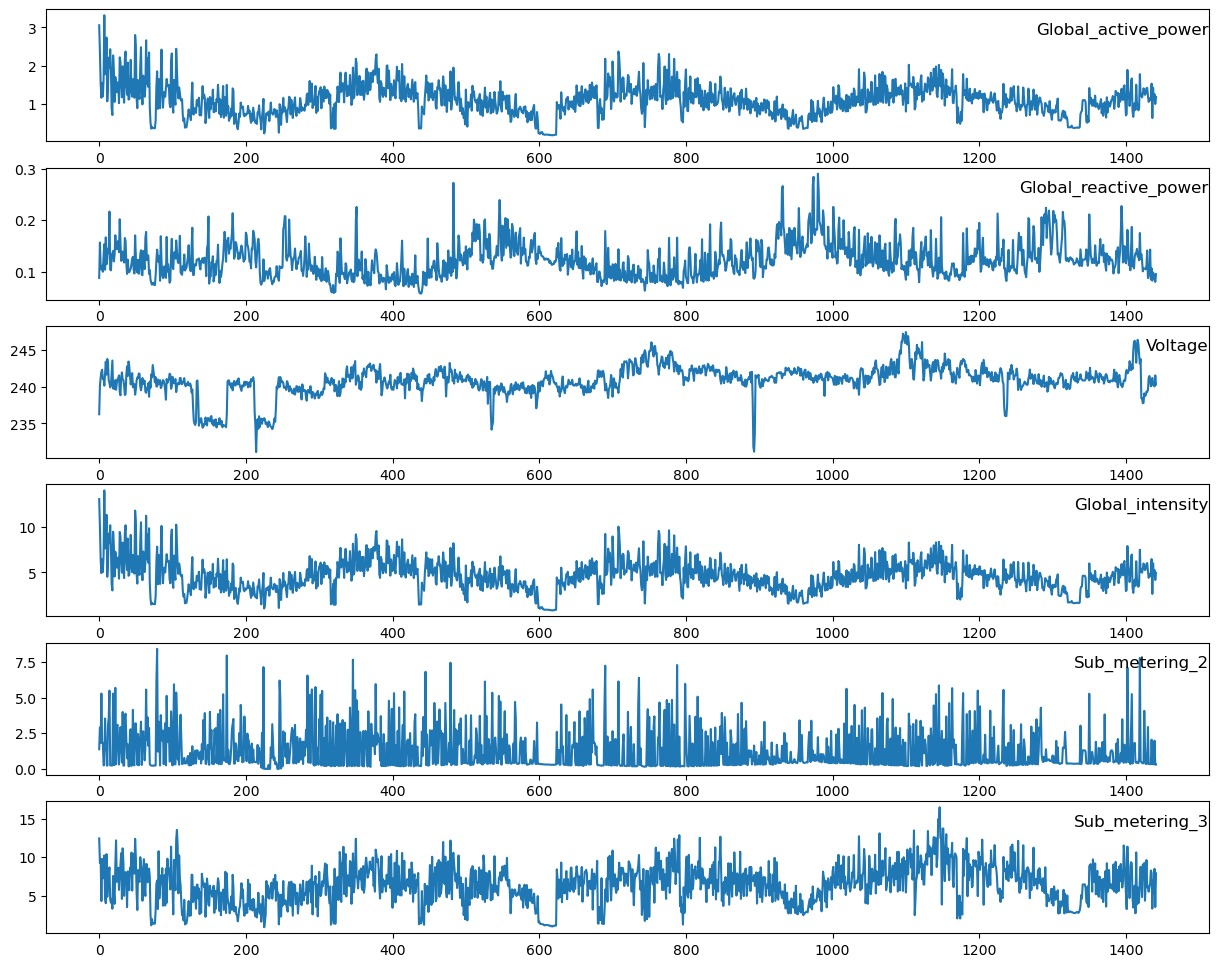

In [27]:
# Below I compare the mean of different features resampled over day. 

cols = [0, 1, 2, 3, 5, 6]
i = 1

values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 12))
for col in cols:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, col])
	plt.title(df.columns[col], y=0.75, loc='right')
	i += 1
plt.show()

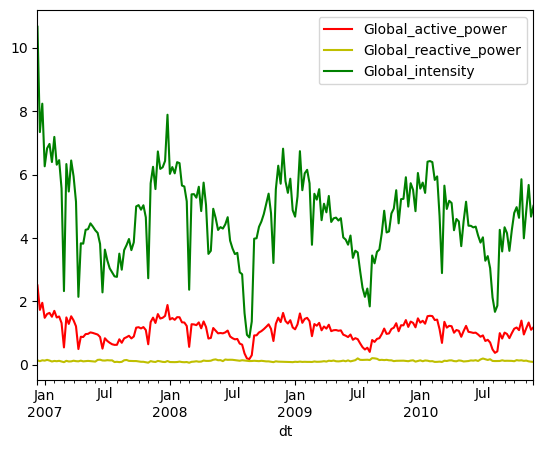

In [76]:
## resampling over week and computing mean

df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
# df.Voltage.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)

plt.show()

/var/folders/2w/qn43kbgn4p9g1b7tj_8r1fwr0000gn/T/ipykernel_77447/2487791744.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


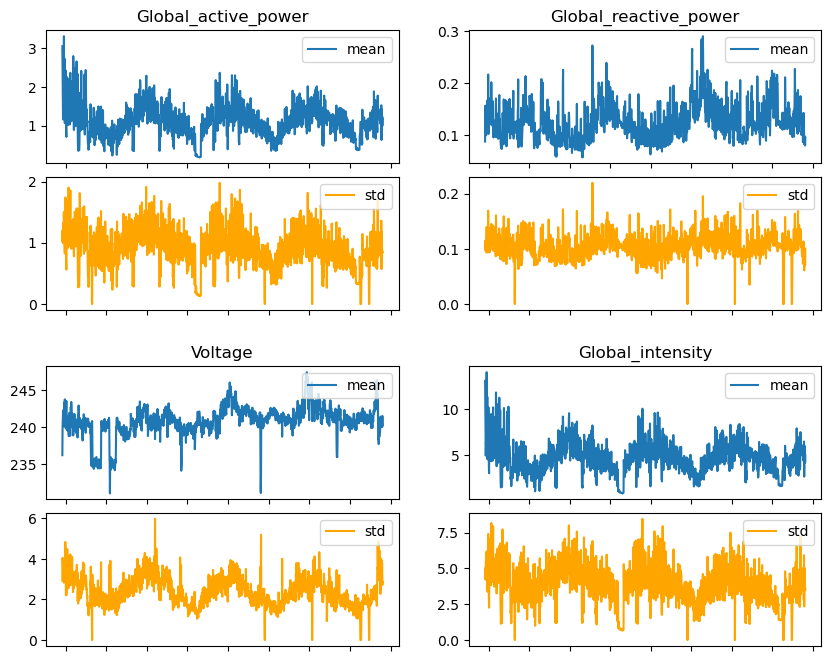

In [59]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 8))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        r1 = df.iloc[:,i].resample('D').agg(['mean', 'std'])
        if j%2==0:
            ax.plot(r1.iloc[:,j],label='mean')
            ax.set_title(df.columns[i])
            ax.legend(['mean'],loc='upper right')

        else:
            ax.plot(r1.iloc[:,j],color='orange')
            ax.legend(['std'],loc='upper right')
        ax.set_xticklabels([])

        fig.add_subplot(ax)

fig.show()

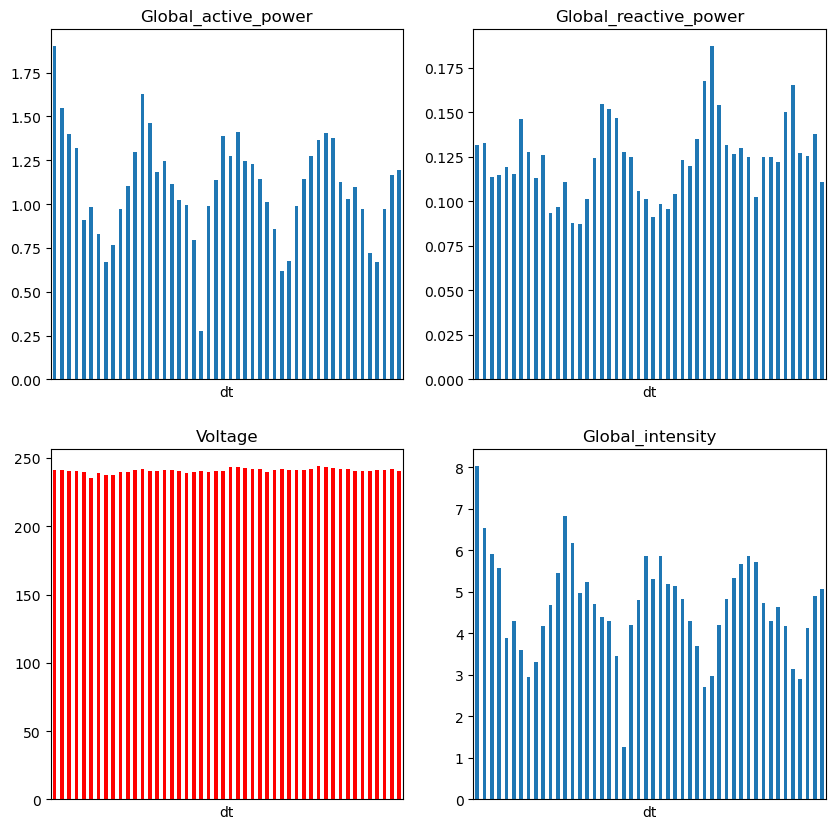

In [73]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))

df.iloc[:,0].resample('M').mean().plot(kind='bar', ax=axarr[0][0],title=df.columns[0],xticks=[])
df.iloc[:,1].resample('M').mean().plot(kind='bar', ax=axarr[0][1],title=df.columns[1],xticks=[])
df.iloc[:,2].resample('M').mean().plot(kind='bar', ax=axarr[1][0],title=df.columns[2],xticks=[],color='red')
df.iloc[:,3].resample('M').mean().plot(kind='bar', ax=axarr[1][1],title=df.columns[3],xticks=[])
plt.show()

We find that the Voltage shows identical each month, others on the other hand are fluctuated.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Global_active_power'),
  Text(1.5, 0, 'Global_reactive_power'),
  Text(2.5, 0, 'Voltage'),
  Text(3.5, 0, 'Global_intensity'),
  Text(4.5, 0, 'Sub_metering_1'),
  Text(5.5, 0, 'Sub_metering_2'),
  Text(6.5, 0, 'Sub_metering_3')])

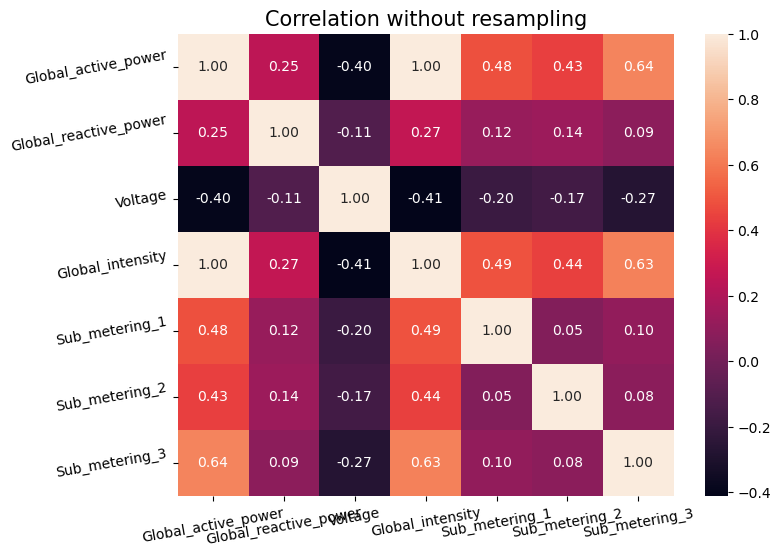

In [82]:
# Correlations among columns
cor = df.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation without resampling',fontsize=15)
ax = sns.heatmap(cor, annot=True, fmt=".2f")
plt.yticks(rotation=10)
plt.xticks(rotation=10) 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Global_active_power'),
  Text(1.5, 0, 'Global_reactive_power'),
  Text(2.5, 0, 'Voltage'),
  Text(3.5, 0, 'Global_intensity'),
  Text(4.5, 0, 'Sub_metering_1'),
  Text(5.5, 0, 'Sub_metering_2'),
  Text(6.5, 0, 'Sub_metering_3')])

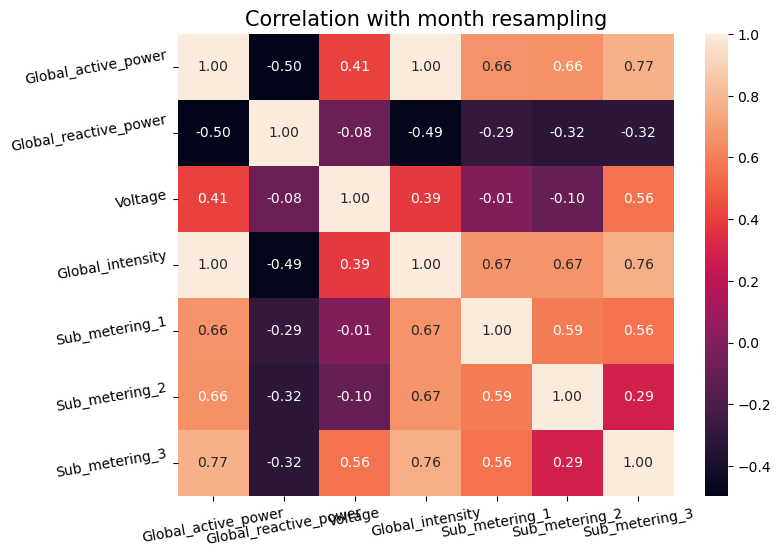

In [83]:
cor = df.resample("M").mean().corr()
plt.figure(figsize=(8,6))
plt.title('Correlation with month resampling',fontsize=15)
ax = sns.heatmap(cor, annot=True, fmt=".2f")
plt.yticks(rotation=10)
plt.xticks(rotation=10) 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Global_active_power'),
  Text(1.5, 0, 'Global_reactive_power'),
  Text(2.5, 0, 'Voltage'),
  Text(3.5, 0, 'Global_intensity'),
  Text(4.5, 0, 'Sub_metering_1'),
  Text(5.5, 0, 'Sub_metering_2'),
  Text(6.5, 0, 'Sub_metering_3')])

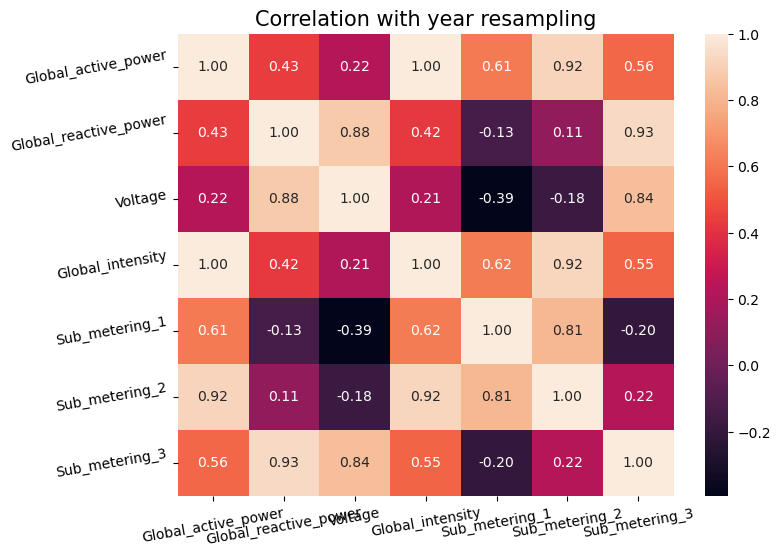

In [85]:
cor = df.resample("A").mean().corr()
plt.figure(figsize=(8,6))
plt.title('Correlation with year resampling',fontsize=15)
ax = sns.heatmap(cor, annot=True, fmt=".2f")
plt.yticks(rotation=10)
plt.xticks(rotation=10) 

# Training Process
## Data Partition

In [87]:
## resampling of data over hour to reduce records
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

In [109]:
train_num = int(df_resample.shape[0]*0.8)
val_num = int(df_resample.shape[0]*0.2)

df_train = df_resample.iloc[:train_num,:]
# df_val = df_resample.iloc[train_num:train_num+val_num,:]
df_test = df_resample.iloc[train_num:,:]

## Scaling

In [110]:
## scale all features in range of [0,1].
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_train)
df_train = scaler.transform(df_train)
# df_val = scaler.transform(df_val)
df_test = scaler.transform(df_test)

## Transform data to LSTM requirement

In [99]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		print(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [111]:
# frame as supervised learning
df_train = series_to_supervised(df_train, 1, 1)
# df_val = series_to_supervised(df_val, 1, 1)
df_test = series_to_supervised(df_test, 1, 1)

# drop columns we don't want to predict
df_train.drop(df_train.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
# df_val.drop(df_val.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
df_test.drop(df_test.columns[[8,9,10,11,12,13]], axis=1, inplace=True)

              0         1         2         3    4         5         6
0      0.636816  0.276074  0.337945  0.631157  0.0  0.011366  0.824504
1      0.545045  0.078322  0.335501  0.541487  0.0  0.144652  0.824776
2      0.509006  0.085225  0.283802  0.502152  0.0  0.030869  0.815811
3      0.488550  0.071773  0.315987  0.481110  0.0  0.000000  0.820701
4      0.455597  0.073853  0.434417  0.449904  0.0  0.008973  0.841891
...         ...       ...       ...       ...  ...       ...       ...
27666  0.192697  0.050179  0.620683  0.181851  0.0  0.000000  0.910350
27667  0.229694  0.074605  0.701288  0.215328  0.0  0.000000  0.925835
27668  0.116144  0.038763  0.782079  0.108560  0.0  0.000000  0.403423
27669  0.028235  0.036418  0.779911  0.026303  0.0  0.000000  0.033415
27670  0.036215  0.140626  0.874716  0.036107  0.0  0.014716  0.034230

[27671 rows x 7 columns]
             0         1         2         3    4         5         6
0     0.054957  0.128413  0.844430  0.053324  0.0  0

In [112]:
# split into input and outputs
train_X, train_y = df_train.values[:, :-1], df_train.values[:, -1]
# val_X, val_y = df_val.values[:, :-1], df_val.values[:, -1]
test_X, test_y = df_test.values[:, :-1], df_test.values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("train:",train_X.shape, train_y.shape)
# print("val:",val_X.shape, val_y.shape)
print("test:",test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

train: (27670, 1, 7) (27670,)
test: (6917, 1, 7) (6917,)


In [113]:
def define_model():
    input1 = Input(shape=(train_X.shape[1], train_X.shape[2]))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    
    return model

In [119]:
model = define_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 7)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             18432     
                                                                 
 dropout_3 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_4 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0     

In [121]:
history = model.fit(train_X, train_y, epochs=50, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/50
390/390 [==============================] - 15s 13ms/step - loss: 0.0138 - val_loss: 0.0105
Epoch 2/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0096 - val_loss: 0.0102
Epoch 3/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0095 - val_loss: 0.0100
Epoch 4/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 5/50
390/390 [==============================] - 4s 10ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 6/50
390/390 [==============================] - 3s 9ms/step - loss: 0.0093 - val_loss: 0.0102
Epoch 7/50
390/390 [==============================] - 4s 9ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 8/50
390/390 [==============================] - 4s 9ms/step - loss: 0.0093 - val_loss: 0.0098
Epoch 9/50
390/390 [==============================] - 5s 12ms/step - loss: 0.0093 - val_loss: 0.0101
Epoch 10/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0093 - val_loss: 0.

In [53]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)



Epoch 1/20
126/126 - 6s - loss: 0.0186 - val_loss: 0.0118 - 6s/epoch - 49ms/step
Epoch 2/20
126/126 - 1s - loss: 0.0123 - val_loss: 0.0106 - 1s/epoch - 11ms/step
Epoch 3/20
126/126 - 1s - loss: 0.0113 - val_loss: 0.0097 - 1s/epoch - 10ms/step
Epoch 4/20
126/126 - 2s - loss: 0.0109 - val_loss: 0.0093 - 2s/epoch - 14ms/step
Epoch 5/20
126/126 - 2s - loss: 0.0106 - val_loss: 0.0094 - 2s/epoch - 13ms/step
Epoch 6/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093 - 1s/epoch - 11ms/step
Epoch 7/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0093 - 1s/epoch - 10ms/step
Epoch 8/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0092 - 1s/epoch - 11ms/step
Epoch 9/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0094 - 1s/epoch - 9ms/step
Epoch 10/20
126/126 - 2s - loss: 0.0105 - val_loss: 0.0092 - 2s/epoch - 14ms/step
Epoch 11/20
126/126 - 1s - loss: 0.0104 - val_loss: 0.0093 - 1s/epoch - 11ms/step
Epoch 12/20
126/126 - 1s - loss: 0.0104 - val_loss: 0.0093 - 1s/epoch - 11ms/step
Epoch 13/20
126/126 - 1s -

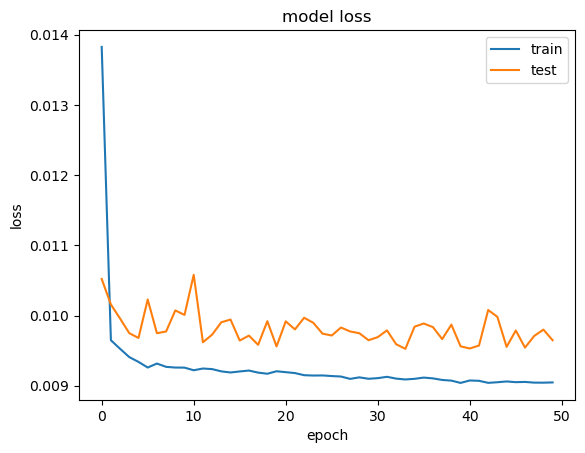

In [122]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [124]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

217/217 [==============================] - 3s 3ms/step
Test RMSE: 0.527


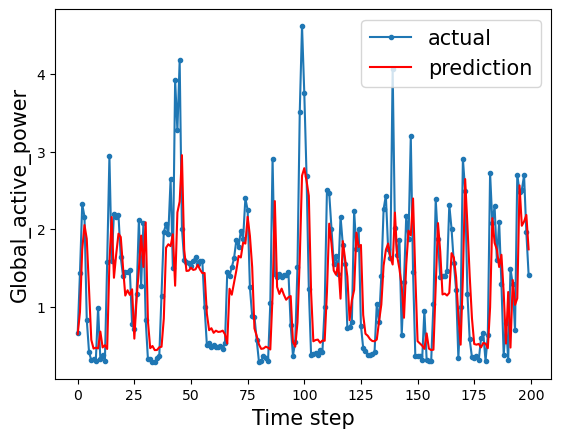

In [125]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()
